In [2]:
import pandas as pd
import numpy as np
import zipfile
import re
from datetime import datetime

In [2]:
!pip3 install spacy

In [3]:
import pathlib
pathlib.Path().absolute()

PosixPath('/content')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science Lab/dataset_v2/green_tweet_ids_v1.csv', index_col=0)
dataset.head()
# for term in dataset:
#   print(term)
# print(dataset["Text"])
allText=[]
for tweet in dataset["text"]:
  allText.append(tweet)
print(allText)

['RT @AngelaNWalker: #RankLisaFirst https://t.co/6abYoSNB1G', 'RT @my2meows: Pls RT\n\n🔥🔥***ATTN:  WISCONSIN***🔥🔥\nHowie Hawkins will be a VALID write in candidate.  Don’t let the Democrats discourage you…', 'RT @GreenPartyUS: fake debates = failed democracy', "RT @MarkNorberg2: @GreenPartyofNJ @realDonaldTrump @FLOTUS @GreenPartyUS @GOP @DNC @HowieHawkins @AngelaNWalker @LatinxsPorHowie Don't thro…", 'RT @HowieHawkins: Do you want #MedicareForAll? There’s only one candidate to vote for this fall! We’re the only major campaign with ballot…', 'One of two elected #Greens in New Jersey, #JessicaClayton, Board of Education, Brick, NJ, is speaking live now with @GreenPartyUS women with @hoffman4US2020 @DrJillStein @LisaForMaine @AngelaNWalker @FrancaMullerPaz and more live on @Facebook and @Twitter. #GreenTwitter rocks!', 'You love to see it. The real crime, however, here is #WhiteSupremacy cloaked in #authoritarian #fascism from @GOP and @realDonaldTrump. Lots of @DNC complicity, too. http

In [7]:
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split(" ")))
dataset[['text','word_count']].head()
dataset.word_count.describe()

count    189.000000
mean      21.396825
std       10.309889
min        2.000000
25%       15.000000
50%       22.000000
75%       25.000000
max       59.000000
Name: word_count, dtype: float64

In [8]:
freq = pd.Series(' '.join(dataset['text']).split()).value_counts()[:20]
freq

RT                 133
the                129
to                  81
and                 72
for                 71
is                  54
of                  50
@AngelaNWalker      49
a                   48
@HowieHawkins:      46
@HowieHawkins       45
in                  42
are                 26
you                 25
@hoffman4US2020     25
@GreenPartyUS       24
we                  21
We                  21
will                20
on                  20
dtype: int64

In [10]:
import nltk
#nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely


In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["RT","SCREEN_NAME", "rt", "http", "https", "co", 'amp', 'latinxsporhowie', 'greenpartyus', 'greentwitter', 'get', 'howie', 'see', 'greenpartyofnj', 'want', 'show', 'one']#, 'like', 'want', 'get', 'know', 'country', 'would', 'make', 'going', 'one', 'year', 'day', 'time', 'realmattcouch', 'check', 'new', 'vice president', 'teamtrump', 'say', 'said', 'show', 'trumpwarroom', 'via', 'text', 'thank']
stop_words = stop_words.union(new_words)

In [57]:
corpus1 = []
for tweet in dataset['text']:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus1.append(text)

In [58]:
corpus = []
for text in corpus1:
  new_text = text.replace('realdonaldtrump', 'trump')
  final = new_text.replace('joebiden', 'biden')
  final = final.replace('coronavirus', 'COVID')
  final = final.replace('corona', 'COVID')
  final = final.replace('president donald trump', 'trump')
  final = final.replace('president donald j trump', 'trump')
  final = final.replace('green new deal', 'gnd')
  final = final.replace('greennewdeal', 'gnd')
  final = final.replace('hoffman', 'madelynhoffman')
  final = final.replace('voter', 'vote')
  final = final.replace(' hawkins', ' howiehawkins')
  if 'one' in final:
    print(final)
  #final = final.replace(' gnd ', ' green-new-deal ')
  #final = final.replace('howiehawkins', 'howie hawkins')
  #final = final.replace('greenpartyus', 'green party')
  #final = final.replace('angelanwalker', 'Angela Walker')
  #final = final.replace('angelawalker', 'angela walker')
  #final = final.replace('hoffman', 'madelyn hoffman')
  #final = final.replace('defundpolice', 'defund police')
  #final = final.replace('defundwar', 'defund war')
  corpus.append(final)

marknorberg talk biden fanatic easy tweet typical convo someone insisting vote gre
angelanwalker psst create million new green job require desecration planet someone shou
vote need hear candidate corproate approved one rely racist trump neoliberal biden address life death issue face need new leadership sign petitionto lethowiedeabte sfhokukw srmaszlpe
da savoltolin dnc gop let onepartystate masquerading democracy know accept unabashed se
sign petition lethowiedebate trump biden debate sure hell debate someone brings life death issue working class facing stage openthedebates sign petition cixkfthrs zeoqwcnaxm
johnstalv sjoneswastaken angelanwalker tx otc xer
glsparks hear ya brother voting green howiehawkins angelanwalker encourage everyone staying home give dnc gop power voting sends strongest message greenenter howiehawkins
pghgreenleft never gone necon pro gop sure making easy u folx thanks dnc losing progressive u demexit greenenter howiehawkins angelanwalker madelynhoffman u
howieh

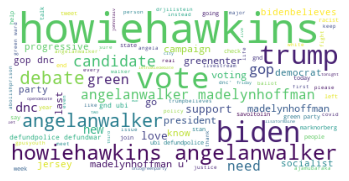

In [59]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
list(cv.vocabulary_.keys())[:10]

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['screen_name'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['angelanwalker',
 'ranklisafirst',
 'abyosnb',
 'angelanwalker ranklisafirst',
 'ranklisafirst abyosnb',
 'angelanwalker ranklisafirst abyosnb',
 'meow',
 'pls',
 'attn',
 'wisconsin']

[Text(0, 0, 'howiehawkins'),
 Text(0, 0, 'angelanwalker'),
 Text(0, 0, 'vote'),
 Text(0, 0, 'biden'),
 Text(0, 0, 'trump'),
 Text(0, 0, 'madelynhoffman'),
 Text(0, 0, 'debate'),
 Text(0, 0, 'green'),
 Text(0, 0, 'dnc'),
 Text(0, 0, 'gop'),
 Text(0, 0, 'candidate'),
 Text(0, 0, 'need'),
 Text(0, 0, 'defundpolice'),
 Text(0, 0, 'love'),
 Text(0, 0, 'party'),
 Text(0, 0, 'gnd'),
 Text(0, 0, 'new'),
 Text(0, 0, 'support'),
 Text(0, 0, 'defundwar'),
 Text(0, 0, 'campaign')]

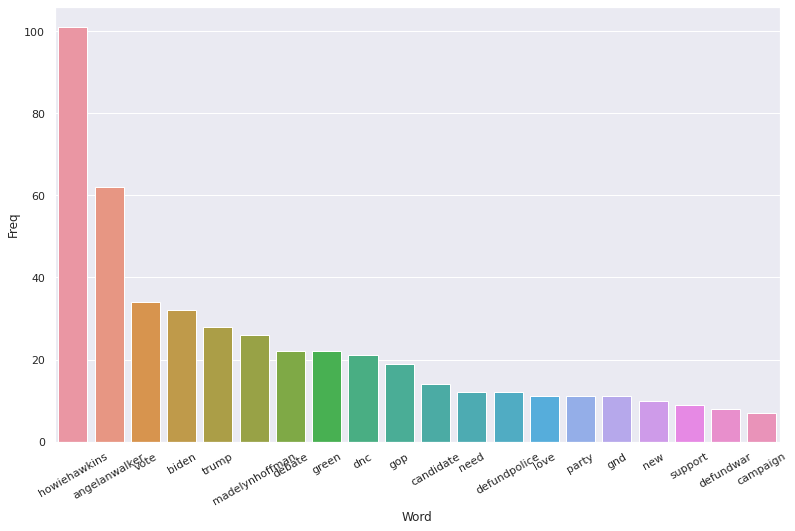

In [61]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                         Bi-gram  Freq
0     howiehawkins angelanwalker    29
1   angelanwalker madelynhoffman    12
2                        gop dnc     9
3              vote howiehawkins     8
4         defundpolice defundwar     7
5                        gnd ubi     6
6                     green ward     5
7        greenenter howiehawkins     5
8    madelynhoffman howiehawkins     5
9                    green party     5
10                      potus vp     5
11    howiehawkins bidenbelieves     5
12              ubi defundpolice     5
13                    life death     4
14    howiehawkins trumpbelieves     4
15                   debate vote     4
16           angelanwalker potus     4
17                    new jersey     3
18                  vp candidate     3
19                   death issue     3


[Text(0, 0, 'howiehawkins angelanwalker'),
 Text(0, 0, 'angelanwalker madelynhoffman'),
 Text(0, 0, 'gop dnc'),
 Text(0, 0, 'vote howiehawkins'),
 Text(0, 0, 'defundpolice defundwar'),
 Text(0, 0, 'gnd ubi'),
 Text(0, 0, 'green ward'),
 Text(0, 0, 'greenenter howiehawkins'),
 Text(0, 0, 'madelynhoffman howiehawkins'),
 Text(0, 0, 'green party'),
 Text(0, 0, 'potus vp'),
 Text(0, 0, 'howiehawkins bidenbelieves'),
 Text(0, 0, 'ubi defundpolice'),
 Text(0, 0, 'life death'),
 Text(0, 0, 'howiehawkins trumpbelieves'),
 Text(0, 0, 'debate vote'),
 Text(0, 0, 'angelanwalker potus'),
 Text(0, 0, 'new jersey'),
 Text(0, 0, 'vp candidate'),
 Text(0, 0, 'death issue')]

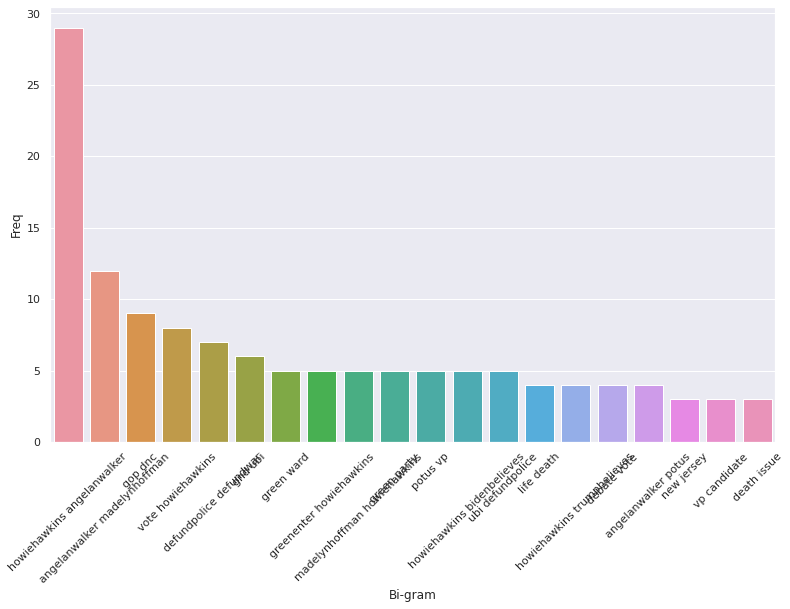

In [120]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [121]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
# doc=corpus[532]
doc=""
for line in corpus:
  doc= doc + str(line)
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [122]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,30)
# now print the results
print("\nText:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Text:
angelanwalker ranklisafirst abyosnb gmeow pls attn wisconsin hawkins valid write candidate let democrat discouragefake debate failed democracymarknorberg greenpartyofnj trump flotus gop dnc howiehawkins angelanwalker throhowiehawkins want medicareforall one candidate vote fall major campaign ballotone two elected green new jersey jessicaclayton board education brick nj speaking live woman madelynhoffman u drjillstein lisaformaine angelanwalker francamullerpaz live facebook twitter rocklove see real crime however whitesupremacy cloaked authoritarian fascism gop trump lot dnc complicity rp btfifriday need help keep growing people powered campaign donate today dek p mxgy hcgulawbttheredshift mathemattic ttaesarang gcramer gdpr sherryb marrziem dragonxcore moron theworld pammyjill marvinis theppl mikevictor montanasociali ppo fund ladyreverbs jaytingwalker ghostlyjorg votegarret comradelegolas savoltolin johnstalv lynninchicago congresskate hregorg nicolenonya fuksoks sjprogressive 